<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [1]:
import json 
# Define the file path for the JSON file
json_file_path = 'problem_1/dataset_1.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path, 'r') as json_file:
    boolean_list_out = json.load(json_file)

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



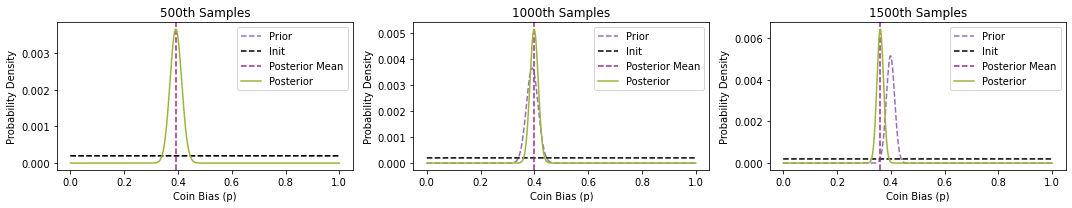

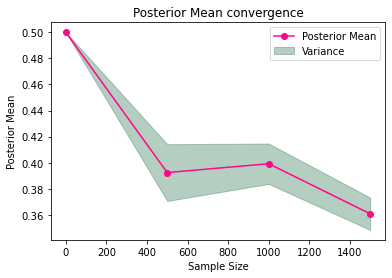

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.stats import binom


N=5000
prior=np.ones(N)
prior/=len(prior)
bias_values=np.linspace(0,1,N)

nj=3

prior0=prior


posterior_mean_arry=[np.sum(bias_values * prior0) / np.sum(prior0)]
posterior_variance_arry=[0.0]
fig, axs = plt.subplots(1, nj, figsize=(15, 3))

for j in range(nj):  
    pathname = f'problem_1/dataset_{j + 1}.json'  # Adjust the index calculation as needed
    with open(pathname, 'r') as json_file:
        boolean_list_out = json.load(json_file)
    boolean_list_out = np.array(boolean_list_out)
    observed_heads = np.sum(boolean_list_out)
    observed_tails = len(boolean_list_out) - observed_heads
    
    likelihood = binom.pmf(observed_heads, len(boolean_list_out), bias_values)
    posterior = prior * likelihood
    posterior /= np.sum(posterior)
    
    posterior_mean = np.sum(bias_values * posterior) / np.sum(posterior)
    posterior_variance=(np.sum(posterior*(bias_values-posterior_mean)**2))/( np.sum(posterior))
    
    posterior_mean_arry.append(posterior_mean)
    posterior_variance_arry.append(posterior_variance)
        
    axs[j].plot(bias_values, prior, label='Prior', color='xkcd:deep lilac', linestyle='--')
    axs[j].plot(bias_values, prior0, label='Init',color='black', linestyle='--')
    axs[j].axvline(x=posterior_mean, color='xkcd:warm purple', linestyle='--', label='Posterior Mean')

    axs[j].plot(bias_values, posterior, color='xkcd:booger', label='Posterior')
    axs[j].set_title(f'{(j+1)*len(boolean_list_out)}th Samples')
    axs[j].set_xlabel('Coin Bias (p)')
    axs[j].set_ylabel('Probability Density')
    axs[j].legend()
    prior = posterior
plt.tight_layout()  # Adjust subplots to fit into the figure area without overlapping
plt.show()
sample_size = len(boolean_list_out)*np.arange(len(posterior_mean_arry))
upper_bound = np.array(posterior_mean_arry) + np.sqrt(np.array(posterior_variance_arry))
lower_bound = np.array(posterior_mean_arry) - np.sqrt(np.array(posterior_variance_arry))

# Plot the posterior mean array
# plt.axhline(y=center_val, color='black', linestyle='--', label=f'True: {center_val}')

plt.plot(sample_size, posterior_mean_arry, color='xkcd:strong pink',label='Posterior Mean', marker='o', linestyle='-')
plt.fill_between(sample_size, lower_bound, upper_bound, color='xkcd:spruce', alpha=0.3, label='Variance')

# Set labels and title
plt.xlabel('Sample Size')
plt.ylabel('Posterior Mean')
plt.title('Posterior Mean convergence')
plt.legend()
plt.show()

<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling’s approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\binom{N}{M}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling’s approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>


## B) 
Numerically check the Stirling’s approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling’s formula (remember, the Stirling’s formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling’s formula and the Gamma function. Please label your plot. 

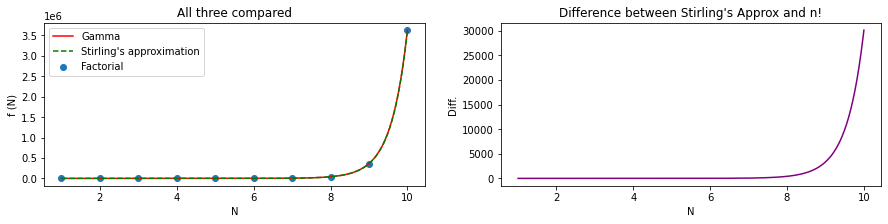

In [88]:
i=0
N=10
fig, axs = plt.subplots(1,2, figsize=(15, 3))
x=np.arange(N)
x+=1 #python indexing things
y=np.vectorize(np.math.factorial)(x)
axs[i].scatter(x,y,label='Factorial')
x=np.linspace(1,N,1000)
y=np.vectorize(np.math.gamma)(x+1)
axs[i].plot(x,y,label='Gamma',color='red')
y=x*np.log(x)-x+1/2*np.log(2*np.pi*x)
y=np.exp(y)
axs[i].plot(x,y,label="Stirling's approximation",color='green',linestyle='--')
axs[i].legend()
axs[i].set_xlabel('N')
axs[i].set_ylabel('f (N)')
axs[i].set_title('All three compared')

y-=np.vectorize(np.math.gamma)(x+1) #x is the same and y is already Stirling's appr.
y*=-1 #want to have the difference be positive
axs[i+1].plot(x,y,color='purple')
axs[i+1].set_xlabel('N')
axs[i+1].set_ylabel('Diff.')
axs[i+1].set_title("Difference between Stirling's Approx and n!")
plt.show()

<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


## C)
Calculate the above condition **analytically**,
<br> 
$$p=\frac{M}{N}$$
<br><br> **Steps:** <br>

<br>
$$
\begin{aligned}
\frac{\partial}{\partial p}\mathcal{P}(M,N|p)&=\frac{\partial}{\partial p}\binom{N}{M} p^{M} (1-p)^{N-M}\\
                                            0&=\binom{N}{M} (Mp^{M-1} (1-p)^{N-M}+(M-N)(1-p)^{N-M-1}p^{M})\\
                                            0&=M(1-p)+(M-N)p\\
                                            Np&=M\\
                                             p&=\frac{M}{N}\\
\end{aligned}
$$
                                                
<br> <br> 
What is the $p_{\rm max}$ for the above three datasets? \
In this case $M$ is the number of successes and $N$ is the number of total trials.\
<br>**Data set 1:** \
$$
\begin{aligned}
\frac{196}{500}&=0.392
\end{aligned}
$$
<br> **Data set 2:** \
$$
\begin{aligned}
\frac{203}{500}&=0.406
\end{aligned}
$$
<br>**Data set 3:** \
$$
\begin{aligned}
\frac{142}{500}&=0.284
\end{aligned}
$$
<br>
code:here
 <!--count_=0
for j in range(nj):
    pathname = f'problem_1/dataset_{j + 1}.json'  # Adjust the index calculation as needed
    with open(pathname, 'r') as json_file:
        boolean_list_out = json.load(json_file)
    boolean_list_out = np.array(boolean_list_out)
    observed_heads = np.sum(boolean_list_out)
    observed_tails = len(boolean_list_out) - observed_heads
    count_=len(boolean_list_out)
    print(observed_heads/count_)
    print(count_)
    print(observed_heads/count_)-->

## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

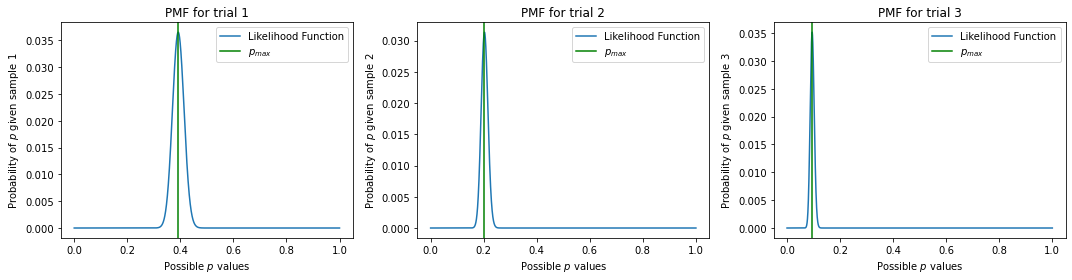

This makes sense as the maximum of the likelihood function is the p value that best fits the sample


In [647]:
N=5000
nj=3
count_array=[]

true_mean_array=[]
mle_est_array=[]
count_=0
fig, axs = plt.subplots(1, nj, figsize=(15, 4))
bias_values=np.linspace(0,1,N)

for j in range(nj):
    pathname = f'problem_1/dataset_{j + 1}.json'  # Adjust the index calculation as needed
    with open(pathname, 'r') as json_file:
        boolean_list_out = json.load(json_file)
    boolean_list_out = np.array(boolean_list_out)
    observed_heads = np.sum(boolean_list_out)
    observed_tails = len(boolean_list_out) - observed_heads
    count_+=len(boolean_list_out)
    count_array.append(count_)
    
    true_mean=observed_heads/count_
    true_mean_array.append(true_mean)
    
    likelihood=binom.pmf(observed_heads,count_,bias_values)
    
    mle_est=bias_values[np.argmax(likelihood)]
    mle_est_array.append(mle_est)
    
    number_heads_arry=np.arange(count_)
    max_likelihood=binom.pmf(number_heads_arry,count_,mle_est)
    
    axs[j].plot(bias_values,likelihood,label='Likelihood Function')
    
    p_max=observed_heads/count_
     
    
    axs[j].axvline(x=p_max,color='green',label='$p_{max}$')

    axs[j].set_xlabel("Possible $p$ values")
    axs[j].set_ylabel(f"Probability of $p$ given sample {j+1}")
    axs[j].set_title(f"PMF for trial {j+1}")
    axs[j].legend()
    
plt.tight_layout()
plt.show()

print("This makes sense as the maximum of the likelihood function is the p value that best fits the sample")



<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

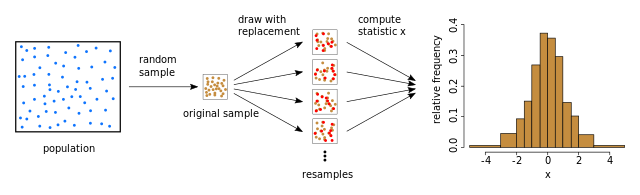
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



Sample Size   Expectation Value   Variance for Dataset 1
5.00          0.35                0.04      
15.00         0.39                0.01      
40.00         0.40                0.01      
60.00         0.39                0.00      
90.00         0.39                0.00      
150.00        0.39                0.00      
210.00        0.39                0.00      
300.00        0.39                0.00      
400.00        0.39                0.00      


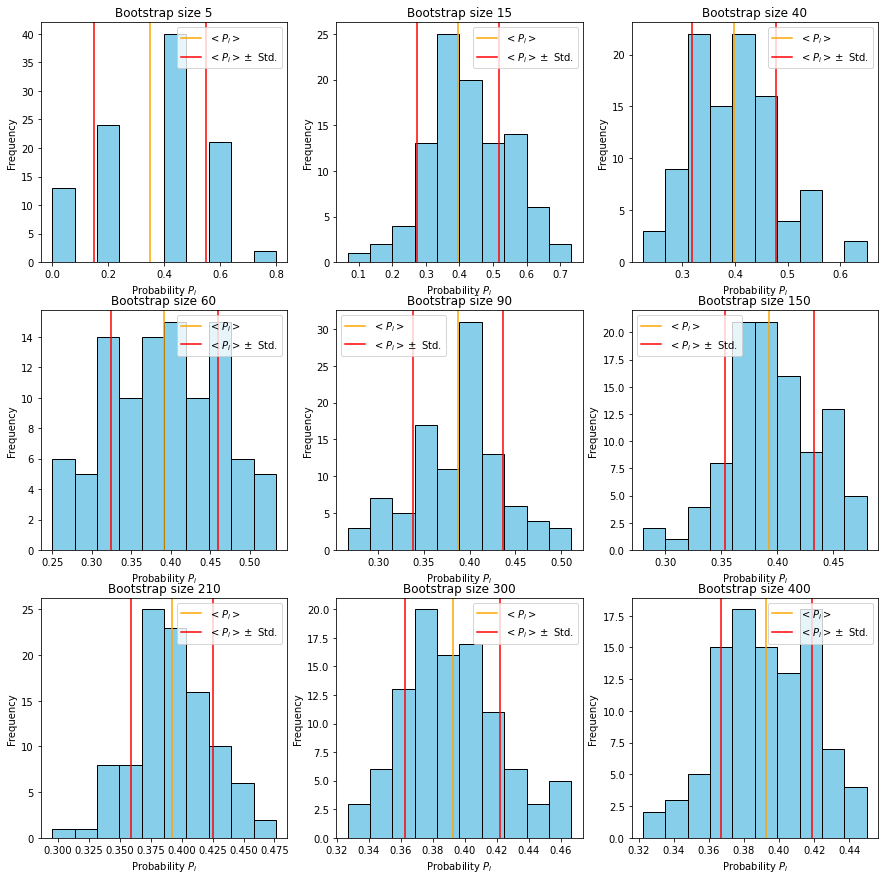

Sample Size   Expectation Value   Variance for Dataset 2
5.00          0.42                0.04      
15.00         0.40                0.01      
40.00         0.41                0.01      
60.00         0.40                0.00      
90.00         0.40                0.00      
150.00        0.40                0.00      
210.00        0.40                0.00      
300.00        0.41                0.00      
400.00        0.41                0.00      


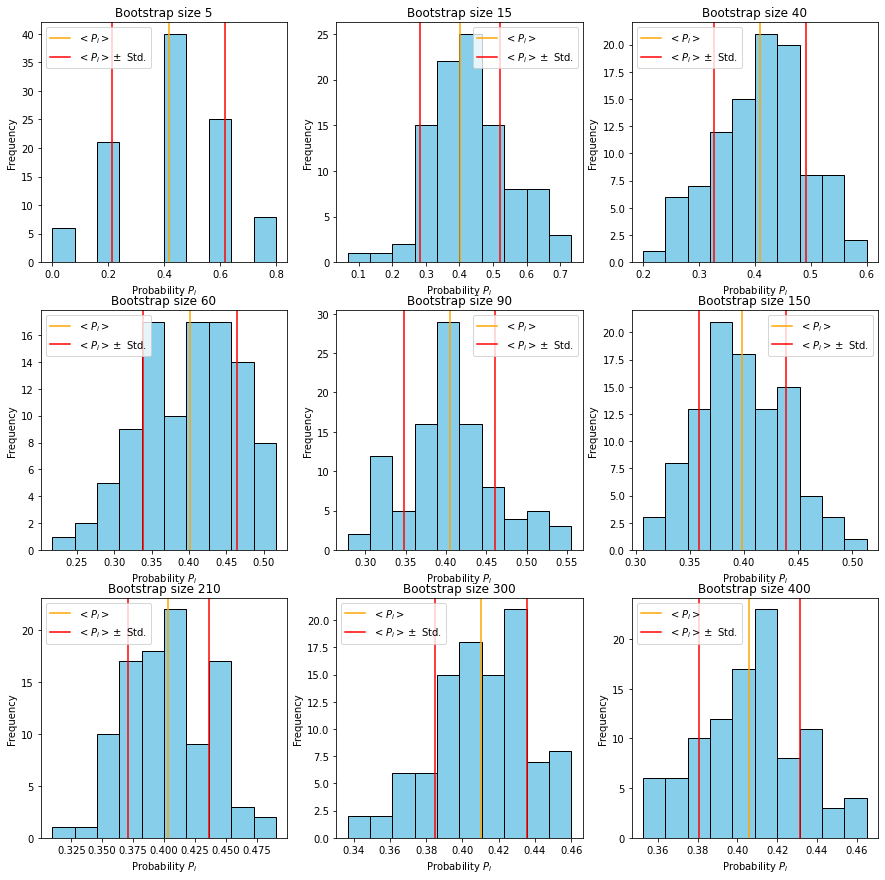

Sample Size   Expectation Value   Variance for Dataset 3
5.00          0.26                0.04      
15.00         0.29                0.01      
40.00         0.28                0.01      
60.00         0.28                0.00      
90.00         0.28                0.00      
150.00        0.28                0.00      
210.00        0.29                0.00      
300.00        0.29                0.00      
400.00        0.28                0.00      


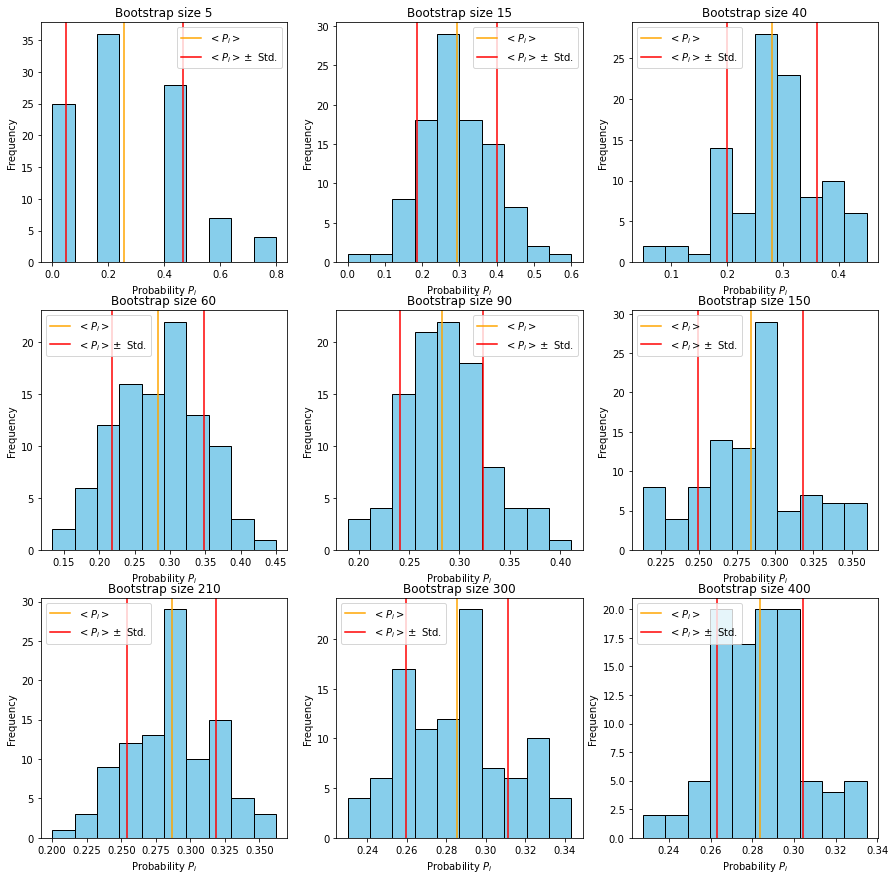

In [663]:
N=100
sample_sizes=[5,15,40,60,90,150,210,300,400]
nj=3
means_total=[]
variance_total=[]
sampled_heads_total=[]
std_total=[]
for j in range(nj): #dataset
    pathname = f'problem_1/dataset_{j + 1}.json'  # Adjust the index calculation as needed
    with open(pathname, 'r') as json_file:
        boolean_list_out = json.load(json_file)
    boolean_list_out = np.array(boolean_list_out)
    observed_heads=np.sum(boolean_list_out)
    observed_mean=observed_heads/len(boolean_list_out)


    ni=3
    nk=3
    fig, axs = plt.subplots(ni,nk, figsize=(15, 15))
    means=[]
    variance=[]
    stds=[]
    for i in range(ni):
        for k in range(nk):

            #bootstrapping!
            samples=[[np.random.choice(boolean_list_out) for q in range(sample_sizes[k+3*i])] for n in range(N)]#so pythonic!
            sampled_heads=[np.sum(sample) for sample in samples]
            sampled_means=[np.sum(sample)/len(sample) for sample in samples]
    #         print(len(sampled_heads))

            sampled_heads_total.append(sampled_heads)
            exp_value=np.mean(sampled_means)
            means.append(exp_value)
            var=np.var(sampled_means)
            variance.append(var)
            std=np.std(sampled_means)
            stds.append(std)
            
            axs[i,k].axvline(x=exp_value,label="$<P_i>$",color='orange')
            axs[i,k].axvline(x=(exp_value-std),color='red')
            axs[i,k].axvline(x=(exp_value+std),label="$<P_i> \pm$ Std.",color='red')

            axs[i,k].hist(sampled_means,color='skyblue',edgecolor='black')
            axs[i,k].set_ylabel("Frequency")
            axs[i,k].set_xlabel("Probability $P_i$")
            axs[i,k].set_title(f"Bootstrap size {sample_sizes[k+3*i]}")
            axs[i,k].legend()

    #         print(k+3*i)
    #         print(exp_value)
    print(f"Sample Size   Expectation Value   Variance for Dataset {j+1}")
    for i in range(len(sample_sizes)):
        sample = f"{sample_sizes[i]:.2f}".ljust(14)
        expectation = f"{means[i]:.2f}".ljust(20)
        var = f"{variance[i]:.2f}".ljust(10)
        print(f"{sample}{expectation}{var}")
    means_total.append(means)
    variance_total.append(variance)
    std_total.append(stds)
    plt.show()

## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

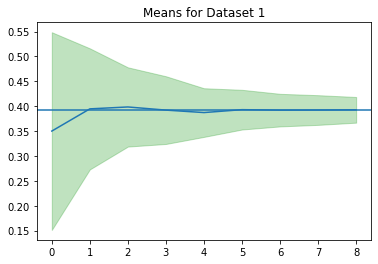

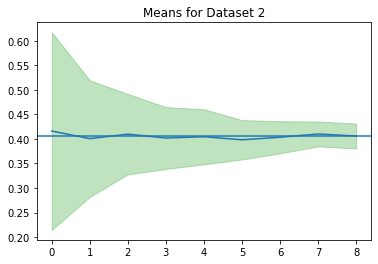

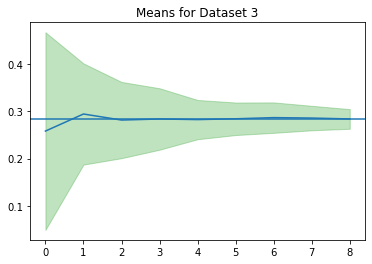

In [665]:
means_total=np.array(means_total)
sample_sizes=np.array(sample_sizes)
variance_total=np.array(variance_total)
std_total=np.array(std_total)

for i in range(3):
    pathname = f'problem_1/dataset_{i + 1}.json'  # Adjust the index calculation as needed
    with open(pathname, 'r') as json_file:
        boolean_list_out = json.load(json_file)
    boolean_list_out = np.array(boolean_list_out)
    observed_heads = np.sum(boolean_list_out)
    count_=len(boolean_list_out)
    trial_number=np.arange(9)
    
    plt.plot(trial_number,means_total[i])
    plt.axhline(y=observed_heads/count_,label='$p_{max}$')
    plt.title(f"Means for Dataset {i+1}")
    lower_bound=means_total[i]-std_total[i]
    upper_bound=means_total[i]+std_total[i]
    plt.fill_between(trial_number, lower_bound, upper_bound, color='tab:green', alpha=0.3, label='Variance')
    plt.show()

<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
​
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
​
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

In [409]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant

    def pdf_decay(self, t):
#         if t<0:
#             print("Must be 0<t<inf")
        amp=np.exp(-1/self.decay_constant)*self.decay_constant
        return np.exp(-(t-1)/self.decay_constant)/self.decay_constant

particle = Particle(2)
result = particle.pdf_decay(1)
print(result)

0.5


## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

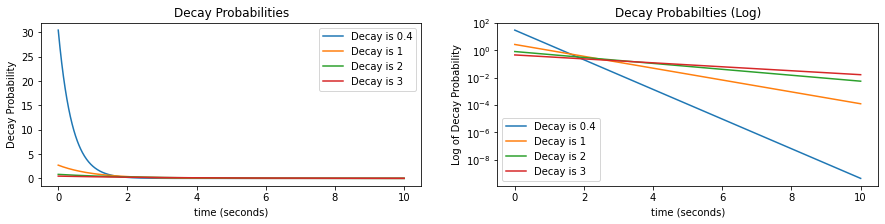

In [426]:
decay_constants=[.4,1,2,3]
particles=[Particle(i) for i in decay_constants]
x=np.linspace(0,10,1000)
fig, axs = plt.subplots(1,2, figsize=(15, 3))
for i,q in enumerate(decay_constants):
    axs[0].plot(x,particles[i].pdf_decay(x),label=f'Decay is {q}')
    axs[0].legend()
    axs[0].set_ylabel("Decay Probability")
    axs[0].set_xlabel("time (seconds)")
    axs[1].set_title("Decay Probabilties (Log)")
    axs[1].semilogy(x,particles[i].pdf_decay(x),label=f'Decay is {q}')
    axs[1].set_ylabel("Log of Decay Probability")
    axs[1].set_xlabel("time (seconds)")
    axs[0].set_title("Decay Probabilities")
    axs[1].legend()
plt.show()

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

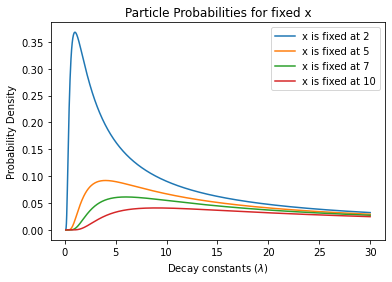

In [446]:
class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant

    def pdf_decay(self, t):
#         if t<0:
#             print("Must be 0<t<inf")
        amp=np.exp(-1/self.decay_constant)*self.decay_constant
        return np.exp(-(t-1)/self.decay_constant)/self.decay_constant
    def pdf_decay2(dc,t):
        return np.exp(-(t-1)/dc)/dc
x_fixed=[2,5,7,10]
particle=Particle(2)#doesn't matter what is input
dc=np.linspace(.1,30,1000)

for x in x_fixed:
    plt.plot(dc,Particle.pdf_decay2(dc,x),label=f'x is fixed at {x}')
    
plt.title("Particle Probabilities for fixed x")
plt.ylabel('Probability Density')

plt.xlabel("Decay constants ($\lambda$)")
plt.legend()
plt.show()
#ask about this

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


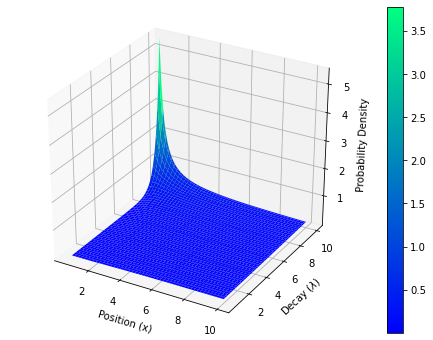

In [692]:
from mpl_toolkits.mplot3d import Axes3D

pathname='Surface_of_particle_density'

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant

    def pdf_decay(self, t):
#         if t<0:
#             print("Must be 0<t<inf")
        amp=np.exp(-1/self.decay_constant)*self.decay_constant
        return np.exp(-(t-1)/self.decay_constant)/self.decay_constant
    def pdf_decay2(self,dc,t): #doesn't need self
        return np.exp(-(t-1)/dc)/dc
    
    
x=np.linspace(.5,10,100)
y=np.linspace(.5,10,100)

y,x=np.meshgrid(x,y)

particle=Particle(0)#doesn't matter the input
z=particle.pdf_decay2(x,y)
z=np.array([z_0[::-1] for z_0 in z]) #I want to switch the peak to the farthest side
# y=np.array([y_0[::-1] for y_0 in y])
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(x,y,z,cmap='winter')
ax.set_xlabel("Position (x)")
ax.set_ylabel("Decay ($\lambda$)")
ax.set_zlabel("Probability Density")

# ticks=[2,4,6,8,10]
# ax.set_yticks(ticks,ticks[::-1])
plt.colorbar(surf)
plt.savefig(pathname,dpi=300)
plt.show()


<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




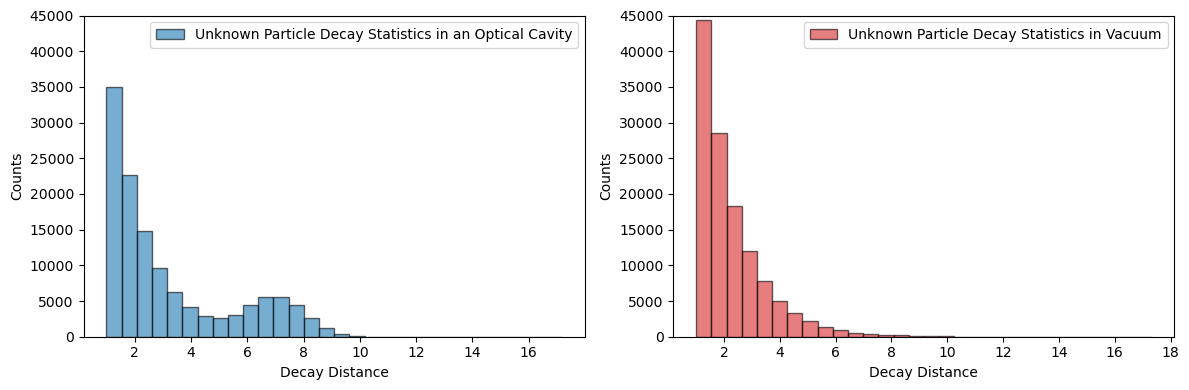

## E)
ou can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

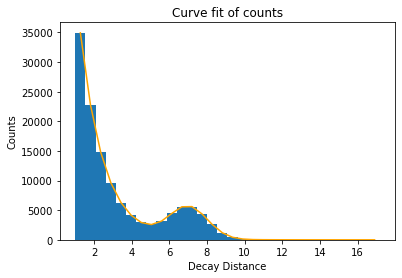

Curve fit gives $\lambda$ as 1.2568685142283267


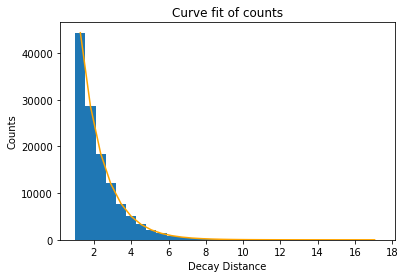

Curve fit gives $\lambda$ as 1.2552080770143585


In [702]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def prob(x,lam,mu,sig,A,B):
    return A*(sp.stats.norm.pdf(x,mu,sig))+B*(np.exp(-(x-1)/lam)/lam)

#will start with the hard one with the optical cavity
pathname = "problem_2/Cavity_decay_dataset.json"

with open(pathname, 'r') as json_file:
    data = json.load(json_file)

bins=np.arange(0,12)
values,bins,_=plt.hist(data,bins=30)
bins = (bins[:-1] + bins[1:]) / 2
popt,perr=sp.optimize.curve_fit(prob,bins,values,maxfev=1000,p0=[.5,7,.2,.3,1])
# plt.plot(bins,values,color='blue')
plt.plot(bins,prob(bins,*popt),color='orange')
plt.title("Curve fit of counts")
plt.xlabel("Decay Distance")
plt.ylabel("Counts")
plt.show()
print(f"Curve fit gives $\lambda$ as {popt[0]}")

pathname="problem_2/Vacuum_decay_dataset.json"
with open(pathname, 'r') as json_file:
    data = json.load(json_file)
bins=np.arange(0,12)
values,bins,_=plt.hist(data,bins=30)
bins = (bins[:-1] + bins[1:]) / 2
popt,perr=sp.optimize.curve_fit(prob,bins,values,maxfev=1000,p0=[.5,7,1,.3,1])
# plt.plot(bins,values,color='blue')
plt.plot(bins,prob(bins,*popt),color='orange')
plt.title("Curve fit of counts")
plt.xlabel("Decay Distance")
plt.ylabel("Counts")
plt.show()
print(f"Curve fit gives $\lambda$ as {popt[0]}")

<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,

<br> 
$$
M(t|\lambda) \sim \frac{e^{\frac{1-x + tx}{\lambda}}}{(-1 + t)}
$$
<br><br> **Steps:** <br>
<br>
We have:
$$
    M(t|\lambda) \sim \int dx e^{tx} P(x | \lambda)
$$
Plugging in $P(x|\lambda)$:
$$
M(t|\lambda) \sim \int dx e^{tx} \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}
$$
Plugging in $Z(\lambda)$:
$$
M(t|\lambda) \sim \int dx e^{tx} \frac{1}{ e^{-1/\lambda}} \frac{1}{\lambda}e^{-x/\lambda}\\
\sim \int dx \frac{e^{(tx-x+1)/\lambda}}{\lambda} \\
\sim \frac{e^{\frac{1-x + tx}{\lambda}}}{(-1 + t)}
$$
<br> <br> 

## B) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
\begin{align}
m_1&=\frac{ -x -\lambda}{\lambda} e^{\frac{1 - x}{\lambda}}\\
m_2&=\frac{ -x^2 -2x\lambda -2\lambda^2}{\lambda^2} e^{\frac{1 - x}{\lambda}}
\end{align}
<br><br> **Steps:** <br>
<br>
We know that the mean is the first moment, $m_1$ and the variance is the second moment, $m_2$. \\
The first and second moments are given by:
\begin{align}
m_1=\left. \frac{\partial}{\partial t} M(t|\lambda) \right|_{t=0}\\
m_2=\left. \frac{\partial^2}{\partial t^2} M(t| \lambda) \right|_{t=0}
\end{align}
The first derivative is given by:
\begin{align}
    \frac{\partial}{\partial t}M(t|\lambda)&=\frac{\partial}{\partial t} \frac{e^{\frac{1-x + tx}{\lambda}}}{(-1 + t)}\\
    &= \frac{(t x -x- \lambda)}{(-1 + t)^2 \lambda} e^{\frac{1 -x + tx}{\lambda}}
\end{align}
The second derivative is given by:
\begin{align}
    \frac{\partial^2}{\partial t^2} M(t|\lambda)&=\frac{\partial^2}{\partial t^2} \frac{e^{\frac{1-x + tx}{\lambda}}}{(-1 + t)}\\
    &=\frac{ \left(( -1 + t)^2 x^2+2x \lambda -2 t x \lambda + 2 \lambda^2\right)}{(-1 + t)^3 \lambda^2}e^{\frac{1 -x + tx}{\lambda}}
\end{align}
Evaluated at zero these give:
\begin{align}
    m_1&=\left. \frac{\partial}{\partial t} M(t|\lambda) \right|_{t=0}\\
    &=\left. \frac{(t x -x- \lambda)}{(-1 + t)^2 \lambda} e^{\frac{1 -x + tx}{\lambda}}\right|_{t=0}\\
    &= \frac{ -x -\lambda}{\lambda} e^{\frac{1 - x}{\lambda}}\\
    m_2&=\left. \frac{\partial^2}{\partial t^2} M(t| \lambda) \right|_{t=0}\\
    &=\left. \frac{ \left(( -1 + t)^2 x^2+2x \lambda -2 t x \lambda + 2 \lambda^2\right)}{(-1 + t)^3 \lambda^2}e^{\frac{1 -x + tx}{\lambda}}\right|_{t=0}\\
    &=\frac{ -x^2 -2x\lambda -2\lambda^2}{\lambda^2} e^{\frac{1 - x}{\lambda}}
\end{align}
<br> <br> 

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

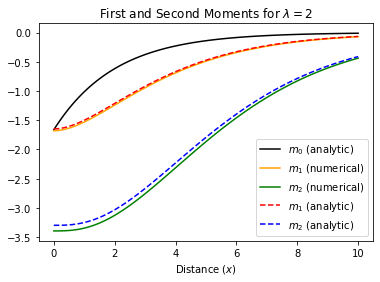

In [824]:
#we know the moment function is:
def M(t,x,lam):
    return np.exp((1-x+t*x)/lam)/(-1+t)
x=np.linspace(0,1,1000)
data_m0=[]
data_m1=[]
data_m2=[]
lam=2
t=np.linspace(-.9,.9,100)
dt=t[1]-t[0]
for x in np.linspace(0,10,100):
    y=M(t,x,lam)
    m1=np.gradient(y,dt)
    index=np.abs(t).argmin()
    data_m0.append([x,y[index]])
    data_m1.append([x,m1[index]])
    m2=np.gradient(m1,dt)
    data_m2.append([x,m2[index]])
#     plt.plot(t,m1,label=f"M,x={x}")
data_m1=np.array(data_m1)
data_m1=data_m1.T
data_m2=np.array(data_m2)
data_m2=data_m2.T
data_m0=np.array(data_m0)
data_m0=data_m0.T
plt.plot(data_m0[0],data_m0[1],label='$m_0$ (analytic)',color='black')
plt.plot(data_m1[0],data_m1[1],label='$m_1$ (numerical)',color='orange')
plt.plot(data_m2[0],data_m2[1],label='$m_2$ (numerical)',color='green')
#now analytic
def Mprime(x,lam):
    return np.exp((1-x)/lam) *(-x-lam)/lam
def Mprimeprime(x,lam):
    return np.exp((1-x)/lam) *(-x**2-2*x*lam-2*lam**2)/(lam**2)
x=data_m0[0]
y=Mprime(x,lam)
plt.plot(x,y,label='$m_1$ (analytic)',color='red',linestyle='--')
y=Mprimeprime(x,lam)
plt.plot(x,y,label='$m_2$ (analytic)',color='blue',linestyle='--')
plt.xlabel('Distance ($x$)')
plt.ylabel('Arbitrary Units')
plt.title(f'First and Second Moments for $\lambda={lam}$')
plt.legend()
plt.show()

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
<br> 

$$
M(p,t)= (1-p+e^{t}p)^N
$$
<br><br> **Steps:** <br>
We know that:
\begin{align}
    M(p,t)&=\sum_{M=0}^{N} e^{M t} P(M,N|p)\\
    &=\sum_{M=0}^{N} e^{M t} \binom{N}{M} p^M (1-p)^{N-M}\\
    &=\sum_{M=0}^{N} \binom{N}{M} (e^{t}p)^M (1-p)^{N-M}\\
\end{align}
Using the identity:
\begin{align*}
    (a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k
\end{align*}
We can show that:
\begin{align}
    M(t)&= (1-p+e^{t}p)^N
\end{align}

## E) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
\begin{align}
    m_1&=Np\\
    m_2&=Np(1-p+Np)
\end{align}
<br><br> **Steps:** <br>
The mean and variance, $m_1$ and $m_2$ are defined by:
\begin{align}
    m_1&=\left. \frac{\partial}{\partial t} M(t) \right|_{t=0}\\
    m_2&=\left. \frac{\partial^2}{\partial t^2} M(t) \right|_{t=0}
\end{align}
We have
\begin{align}
    \frac{\partial}{\partial t} M(t) &=N e^{t} p (1 - p + e^{t}p)^{N-1}\\
    \frac{\partial^2}{\partial t^2} M(t) &=N e^{t} p (1 - p + e^{t} p)^{N-2}(1 - p + N e^{t} p )
\end{align}
Evaluated at $t=0$, these give:
\begin{align}
    m_1&=Np\\
    m_2&=Np(1-p+Np)
\end{align}
<br> <br> 

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

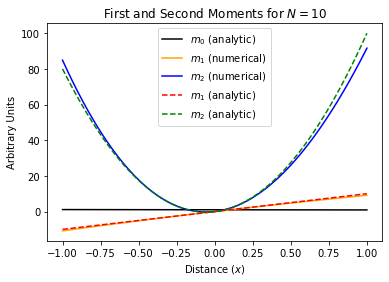

In [831]:
#I'm going to assume that in this case $\lambda$ means p
from scipy.stats import binom
def Mt(p,N,t):
    return np.power((1-p+np.exp(t)*p),N)
N=10
p_true=.5
M=N*p_true


t=np.linspace(-1,1,100)
dt=t[1]-t[0]
data_m0=[]
data_m1=[]
data_m2=[]
for x in np.linspace(-1,1,100):
    y=Mt(x,N,t)
    m1=np.gradient(y,dt)
    index=np.abs(t).argmin()#gets the index of x==0
    data_m0.append([x,y[index]])
    data_m1.append([x,m1[index]])
    m2=np.gradient(m1,dt)
    data_m2.append([x,m2[index]])
data_m1=np.array(data_m1)
data_m1=data_m1.T
data_m2=np.array(data_m2)
data_m2=data_m2.T
data_m0=np.array(data_m0)
data_m0=data_m0.T
y=binom.pmf(M,N,data_m0[0])
plt.plot(data_m0[0],data_m0[1],label='$m_0$ (analytic)',color='black')
plt.plot(data_m1[0],data_m1[1],label='$m_1$ (numerical)',color='orange')
plt.plot(data_m2[0],data_m2[1],label='$m_2$ (numerical)',color='blue')
x=data_m0[0]
y=N*x
plt.plot(x,y,label='$m_1$ (analytic)',color='red',linestyle='--')
y=N*x*(1-x+N*x)
plt.plot(x,y,label='$m_2$ (analytic)',color='green',linestyle='--')
plt.legend()
plt.title(f'First and Second Moments for $N={N}$')
plt.xlabel('Distance ($x$)')
plt.ylabel('Arbitrary Units')
plt.show()